# Pierre Gasly
<img src="https://www.formula1.com/content/fom-website/en/drivers/pierre-gasly/_jcr_content/image.img.1920.medium.jpg/1646819179303.jpg" width="300">

### Team: AlphaTauri

<img src ="https://www.formula1.com/content/fom-website/en/drivers/pierre-gasly/_jcr_content/helmet.img.png/1646824648814.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

gas_laps <- lap_data %>%
            filter(driverId == 842)



# Season Analysis

In [4]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
990,57
1011,57
1045,57
1052,52


`geom_smooth()` using formula 'y ~ x'



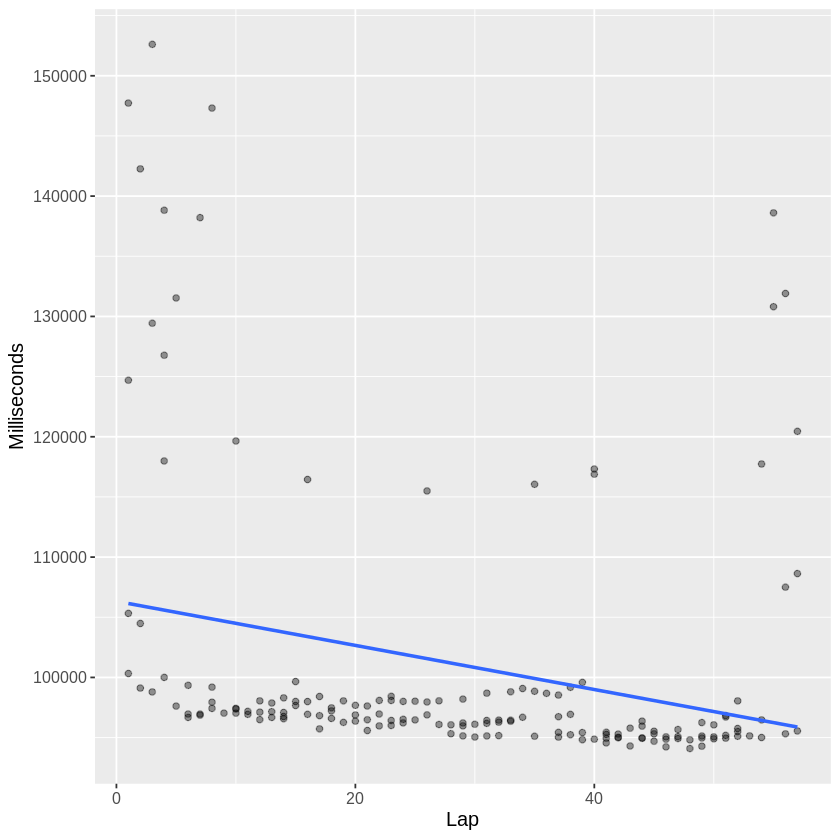

In [5]:
set.seed(2022)

#1. Bahrain 

pg_bahrain <- gas_laps %>%
                filter(raceId %in% bahrain_race_ID) 

pg_bahrain_clean <- pg_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
pg_bahrain_clean
pg_bahrain_clean_ID <- pg_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_bahrain_races <- gas_laps %>%
                    filter(raceId %in% pg_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(pg_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1054,66
1042,65


`geom_smooth()` using formula 'y ~ x'



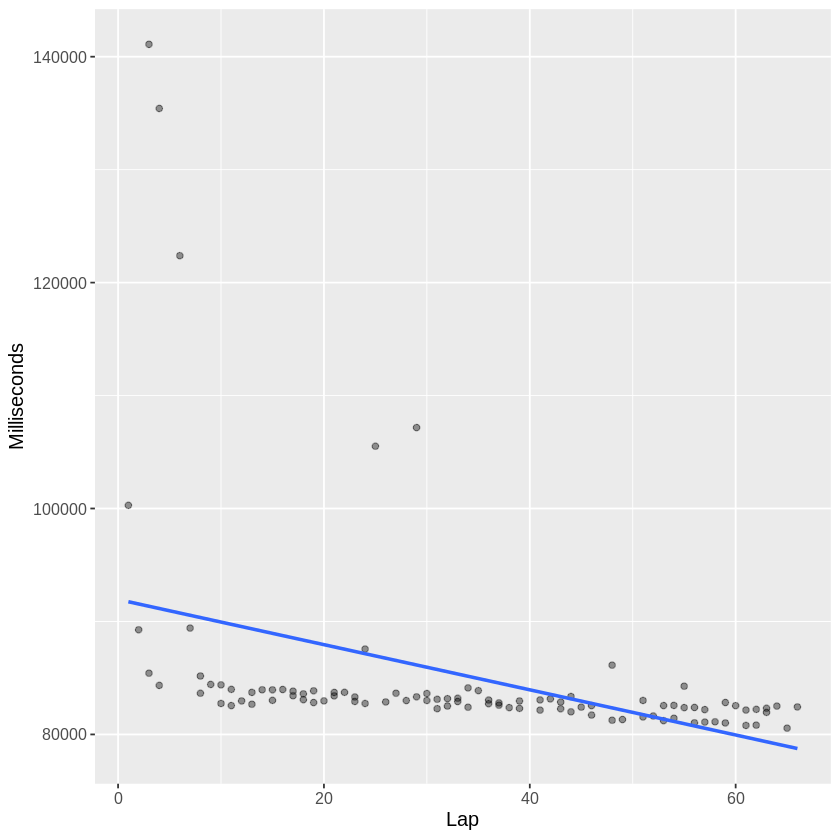

In [6]:
set.seed(2022)

#2. Portimão

pg_Portimão <- gas_laps %>%
                filter(raceId %in% Portimão_race_ID) 

pg_Portimão_clean <- pg_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
pg_Portimão_clean
pg_Portimão_clean_ID <- pg_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_Portimão_races <- gas_laps %>%
                    filter(raceId %in% pg_Portimão_clean_ID) 

formulaone_split <- initial_split(pg_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1010,57
989,13


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



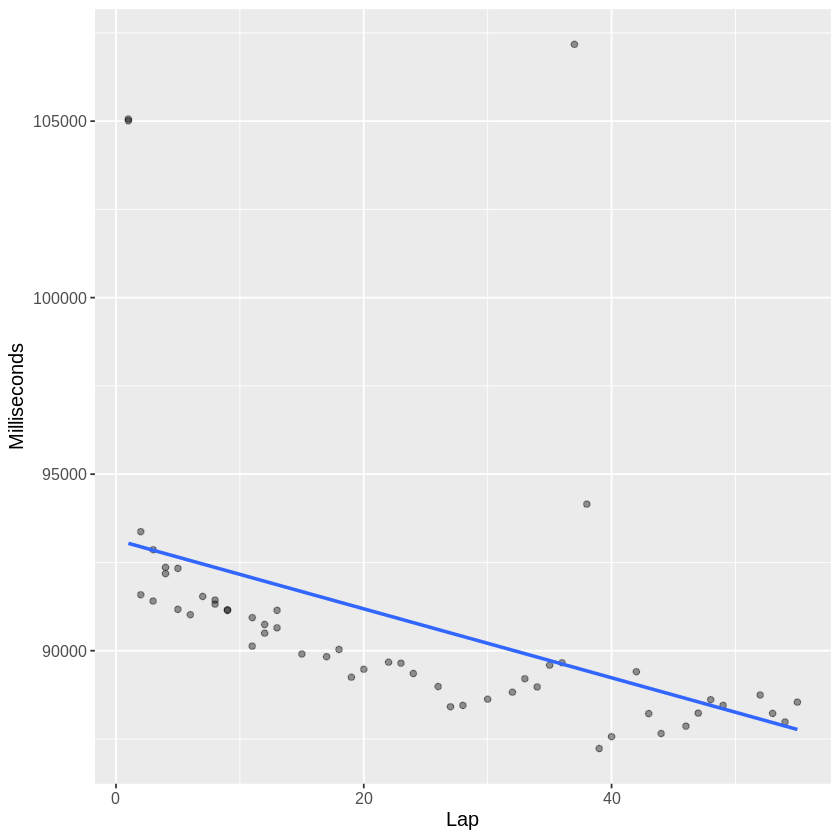

In [7]:
set.seed(2022)

#3. Australia

pg_aus <- gas_laps %>%
                filter(raceId %in% aus_race_ID) 

pg_aus_clean <- pg_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
pg_aus_clean
pg_aus_clean_ID <- pg_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_aus_races <- gas_laps %>%
                    filter(raceId %in% pg_aus_clean_ID)

formulaone_split <- initial_split(pg_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

### GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1053,63
1043,8


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



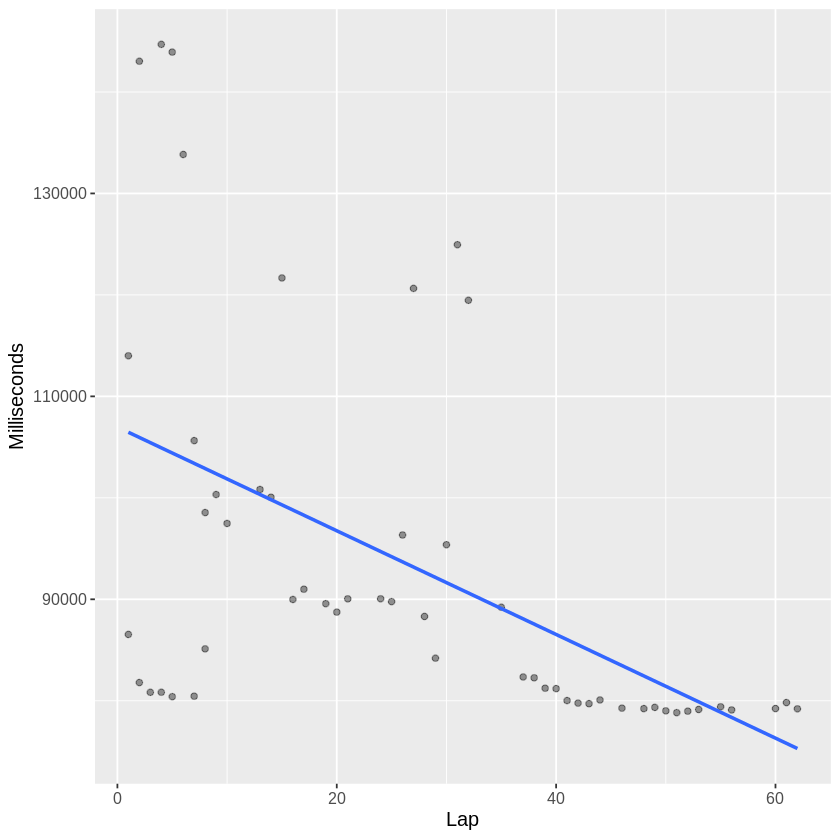

In [8]:
set.seed(2022)

#4. Italy, Imola

pg_imola <- gas_laps %>%
                filter(raceId %in% imola_race_ID) 

pg_imola_clean <- pg_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
pg_imola_clean
pg_imola_clean_ID <- pg_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_imola_races <- gas_laps %>%
                    filter(raceId %in% pg_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(pg_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1067,58
1044,57


`geom_smooth()` using formula 'y ~ x'



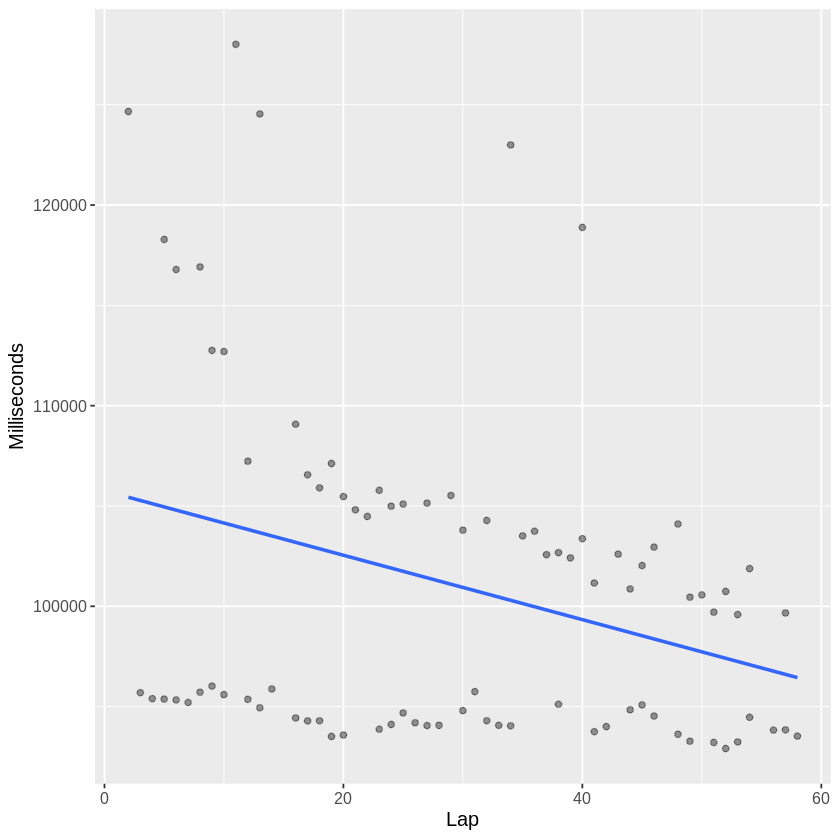

In [9]:
set.seed(2022)

#5. Turkey (Replacing Miami)

pg_turkey <- gas_laps %>%
                filter(raceId %in% turkey_race_ID) 

pg_turkey_clean <- pg_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
pg_turkey_clean
pg_turkey_clean_ID <- pg_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_turkey_races <- gas_laps %>%
                    filter(raceId %in% pg_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(pg_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1014,66
1036,65
1055,65


`geom_smooth()` using formula 'y ~ x'



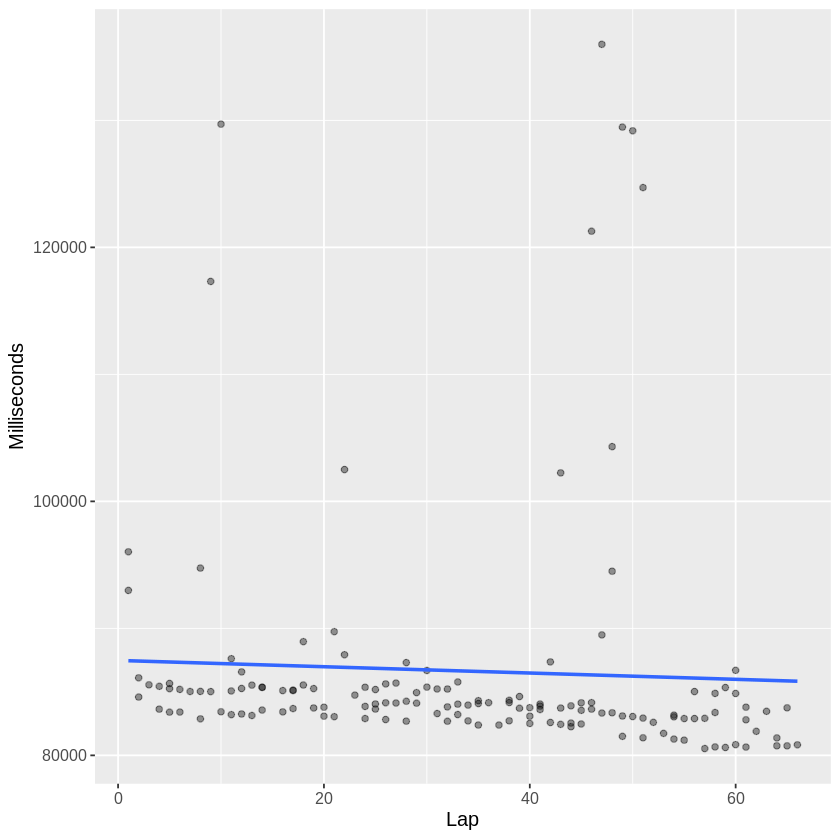

In [10]:
set.seed(2022)

#6. Spain

pg_spain <- gas_laps %>%
                filter(raceId %in% spain_race_ID) 

pg_spain_clean <- pg_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
pg_spain_clean
pg_spain_clean_ID <- pg_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_spain_races <- gas_laps %>%
                    filter(raceId %in% pg_spain_clean_ID)

formulaone_split <- initial_split(pg_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
994,78
1015,78
1056,78


`geom_smooth()` using formula 'y ~ x'



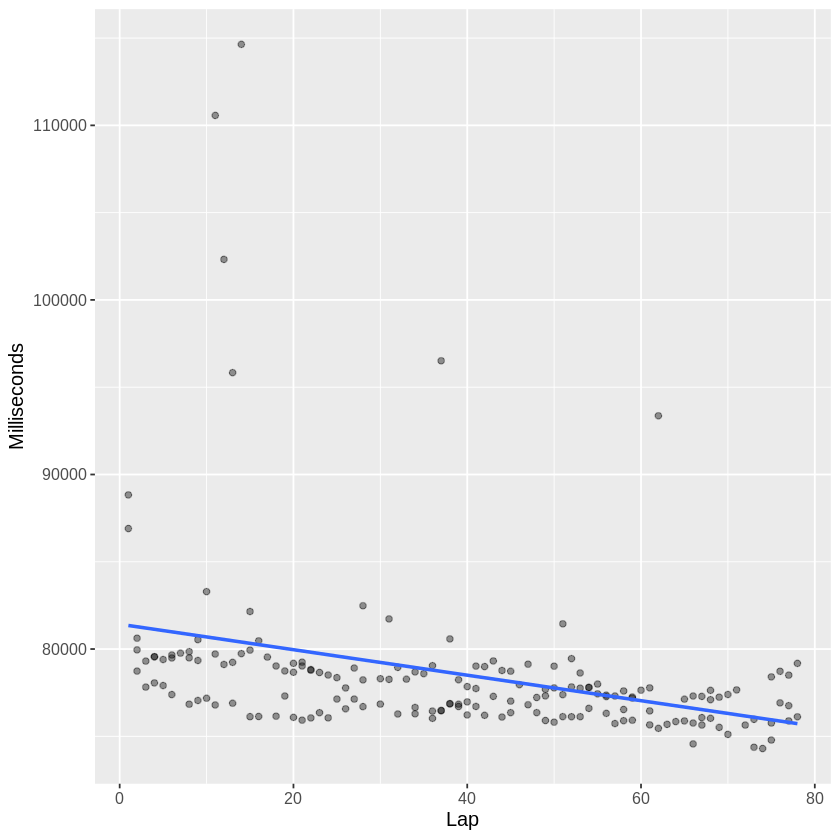

In [11]:
set.seed(2022)

#7. Monaco

pg_monaco <- gas_laps %>%
                filter(raceId %in% monaco_race_ID) 

pg_monaco_clean <- pg_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
pg_monaco_clean
pg_monaco_clean_ID <- pg_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_monaco_races <- gas_laps %>%
                    filter(raceId %in% pg_monaco_clean_ID)

formulaone_split <- initial_split(pg_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
992,51
1057,51
1013,38


`geom_smooth()` using formula 'y ~ x'



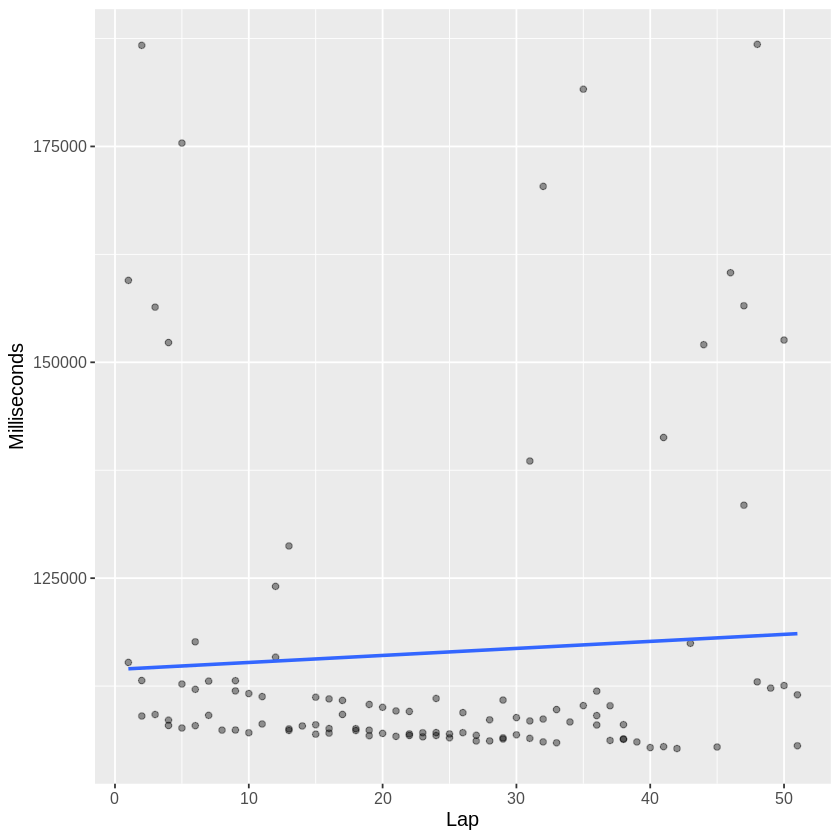

In [12]:
set.seed(2022)

#8. Azerbaijan

pg_azerbaijan <- gas_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

pg_azerbaijan_clean <- pg_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
pg_azerbaijan_clean
pg_azerbaijan_clean_ID <- pg_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_azerbaijan_races <- gas_laps %>%
                    filter(raceId %in% pg_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(pg_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1016,69
995,67


`geom_smooth()` using formula 'y ~ x'



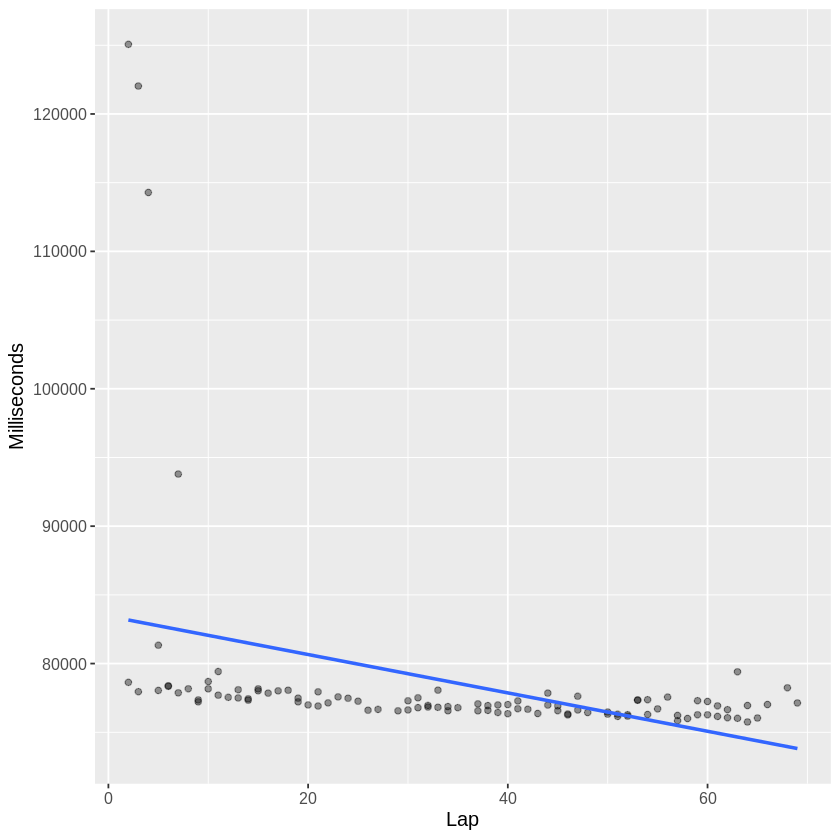

In [13]:
set.seed(2022)

#9. Canada

pg_canada <- gas_laps %>%
                filter(raceId %in% canada_race_ID) 

pg_canada_clean <- pg_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
pg_canada_clean
pg_canada_clean_ID <- pg_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_canada_races <- gas_laps %>%
                    filter(raceId %in% pg_canada_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(pg_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

### GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
998,52
1019,52
1034,52
1035,52
1061,52


`geom_smooth()` using formula 'y ~ x'



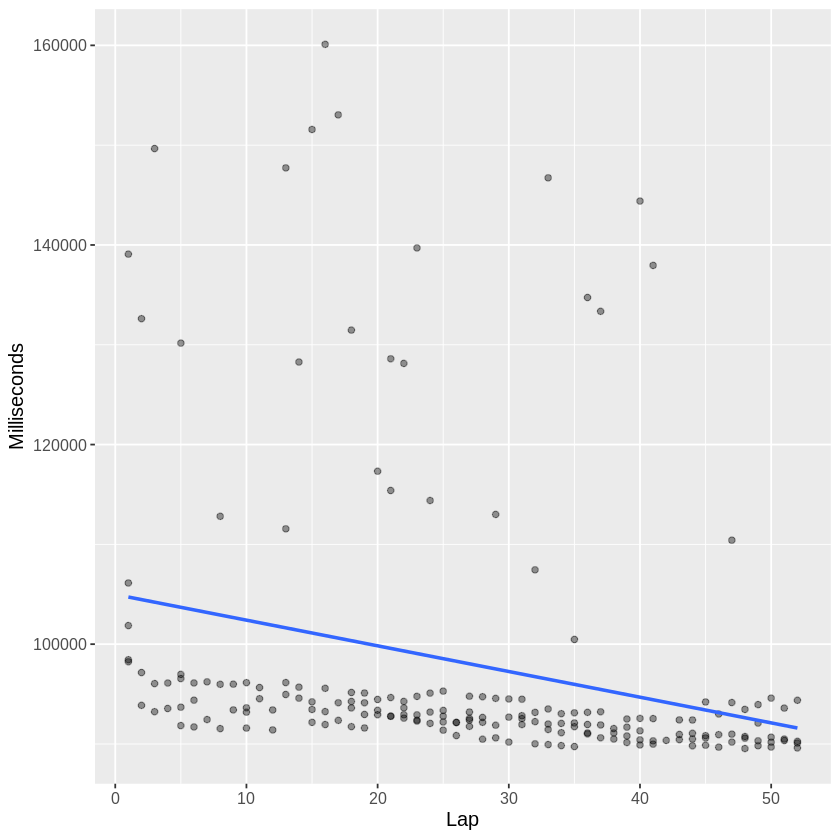

In [14]:
set.seed(2022)

#10. Great Britain

pg_uk <- gas_laps %>%
                filter(raceId %in% uk_race_ID) 

pg_uk_clean <- pg_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
pg_uk_clean
pg_uk_clean_ID <- pg_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_uk_races <- gas_laps %>%
                    filter(raceId %in% pg_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(pg_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1031,71
1060,71
997,70
1018,70
1032,70
1058,1


`geom_smooth()` using formula 'y ~ x'



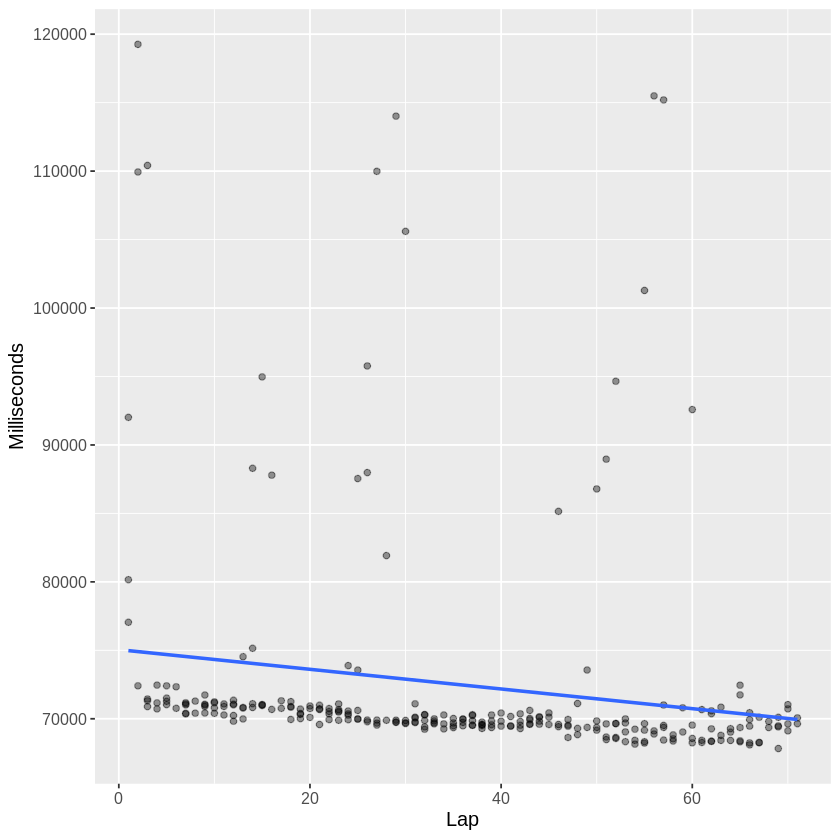

In [15]:
set.seed(2022)

#11. Austria

pg_austria <- gas_laps %>%
                filter(raceId %in% austria_race_ID) 

pg_austria_clean <- pg_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
pg_austria_clean
pg_austria_clean_ID <- pg_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_austria_races <- gas_laps %>%
                    filter(raceId %in% pg_austria_clean_ID)

formulaone_split <- initial_split(pg_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1059,53
1017,52


`geom_smooth()` using formula 'y ~ x'



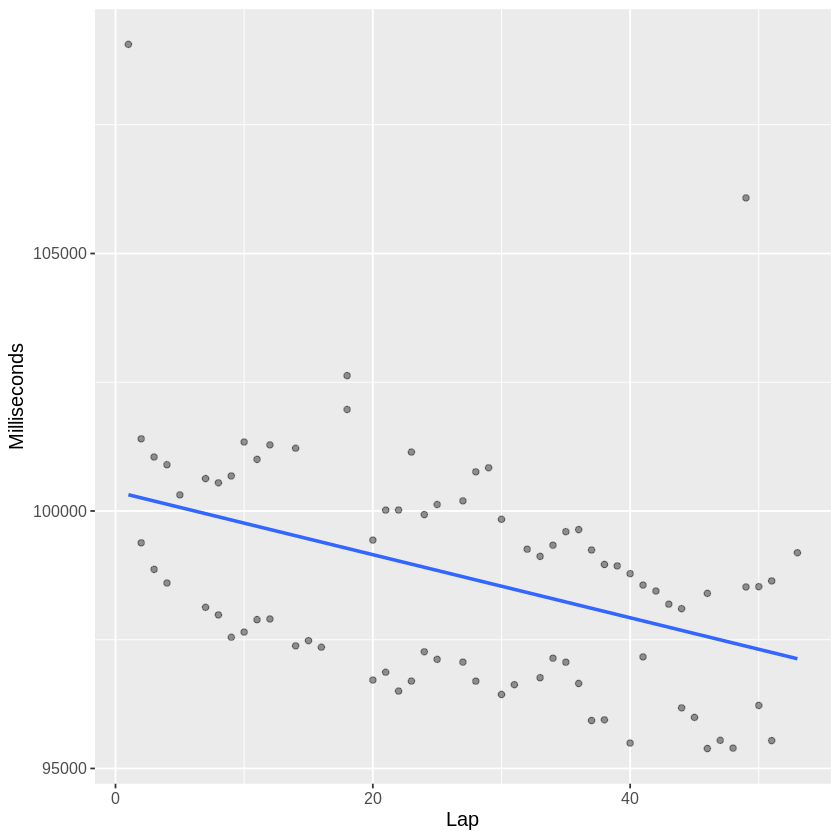

In [16]:
set.seed(2022)

#12. France

pg_france <- gas_laps %>%
                filter(raceId %in% france_race_ID) 

pg_france_clean <- pg_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
pg_france_clean
pg_france_clean_ID <- pg_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_france_races <- gas_laps %>%
                    filter(raceId %in% pg_france_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(pg_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1000,70
1062,70
1021,69
1033,15


`geom_smooth()` using formula 'y ~ x'



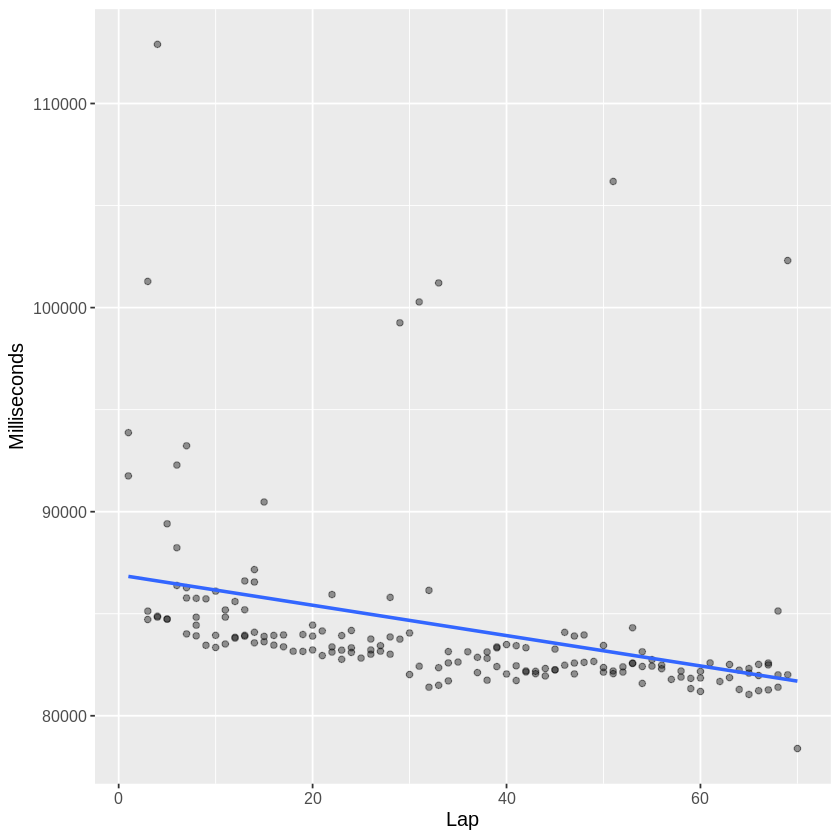

In [17]:
set.seed(2022)

#13. Hungary

pg_hungary <- gas_laps %>%
                filter(raceId %in% hungary_race_ID) 

pg_hungary_clean <- pg_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))                      
pg_hungary_clean
pg_hungary_clean_ID <- pg_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_hungary_races <- gas_laps %>%
                    filter(raceId %in% pg_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(4:1000)

formulaone_split <- initial_split(pg_hungary_races, prop = 0.75, strata = milliseconds) 

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1001,44
1022,44
1037,44
1063,1


`geom_smooth()` using formula 'y ~ x'



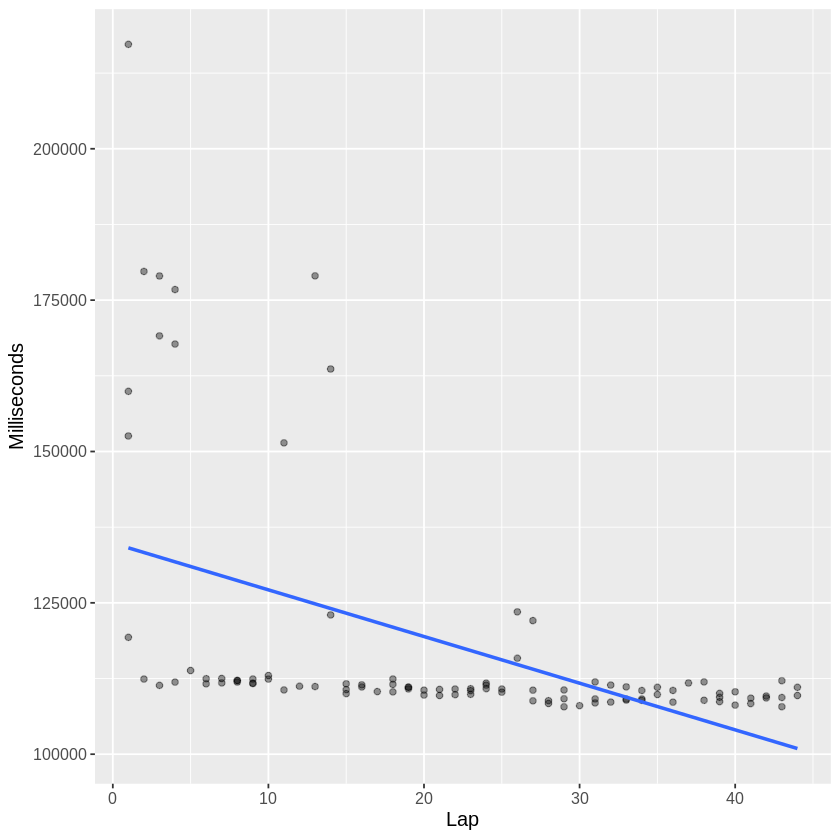

In [18]:
set.seed(2022)

#14. Belgium

pg_belgium <- gas_laps %>%
                filter(raceId %in% belgium_race_ID) 

pg_belgium_clean <- pg_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
pg_belgium_clean
pg_belgium_clean_ID <- pg_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_belgium_races <- gas_laps %>%
                    filter(raceId %in% pg_belgium_clean_ID)

formulaone_split <- initial_split(pg_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,71


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



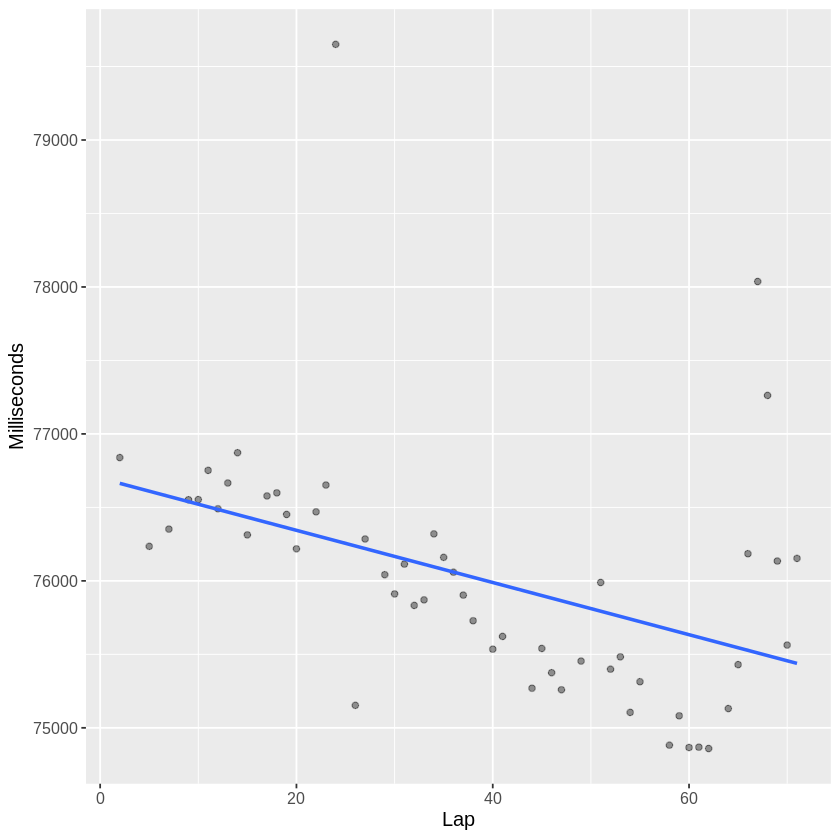

In [19]:
set.seed(2022)

#15. Netherlands

pg_netherlands <- gas_laps %>%
                filter(raceId %in% netherlands_race_ID) 

pg_netherlands_clean <- pg_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
pg_netherlands_clean
pg_netherlands_clean_ID <- pg_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_netherlands_races <- gas_laps %>%
                    filter(raceId %in% pg_netherlands_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(pg_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1038,53
1002,52
1023,52
1065,3


`geom_smooth()` using formula 'y ~ x'



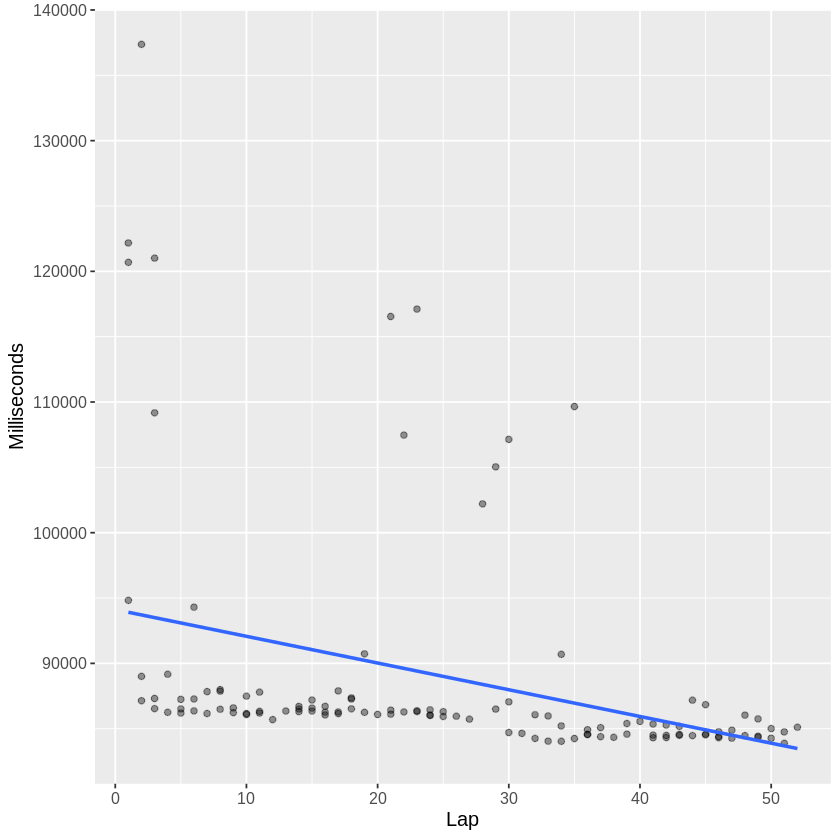

In [20]:
set.seed(2022)

#16. Italy, Monza

pg_monza <- gas_laps %>%
                filter(raceId %in% monza_race_ID) 

pg_monza_clean <- pg_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
pg_monza_clean
pg_monza_clean_ID <- pg_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_monza_races <- gas_laps %>%
                    filter(raceId %in% pg_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(pg_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1024,61
1003,60


`geom_smooth()` using formula 'y ~ x'



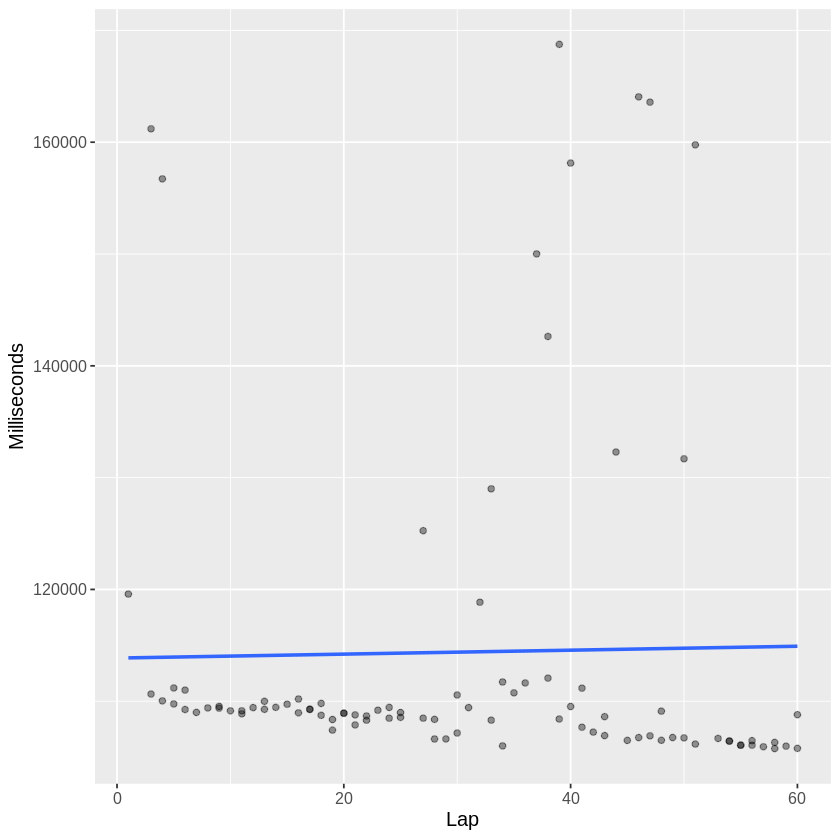

In [21]:
set.seed(2022)

#17. Singapore

pg_singapore <- gas_laps %>%
                filter(raceId %in% singapore_race_ID) 

pg_singapore_clean <- pg_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
pg_singapore_clean
pg_singapore_clean_ID <- pg_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_singapore_races <- gas_laps %>%
                    filter(raceId %in% pg_singapore_clean_ID)

formulaone_split <- initial_split(pg_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

### GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
984,52
1005,52
1026,51


`geom_smooth()` using formula 'y ~ x'



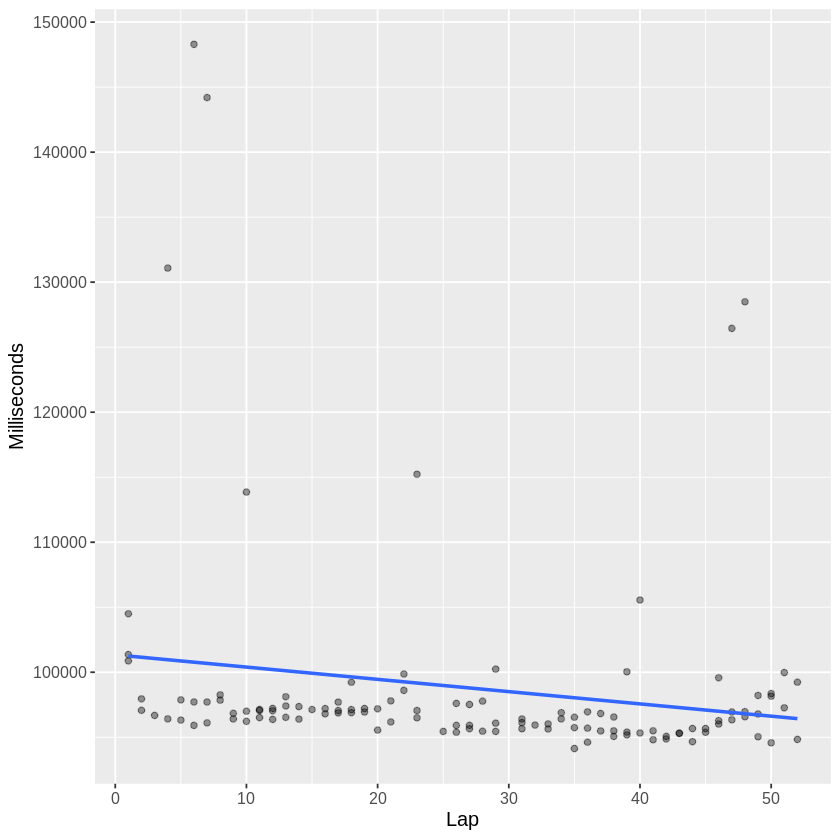

In [22]:
set.seed(2022)

#18. Japan

pg_japan <- gas_laps %>%
                filter(raceId %in% japan_race_ID) 

pg_japan_clean <- pg_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
pg_japan_clean
pg_japan_clean_ID <- pg_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_japan_races <- gas_laps %>%
                    filter(raceId %in% pg_japan_clean_ID)

formulaone_split <- initial_split(pg_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

### GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1006,55
1028,54
1069,14


`geom_smooth()` using formula 'y ~ x'



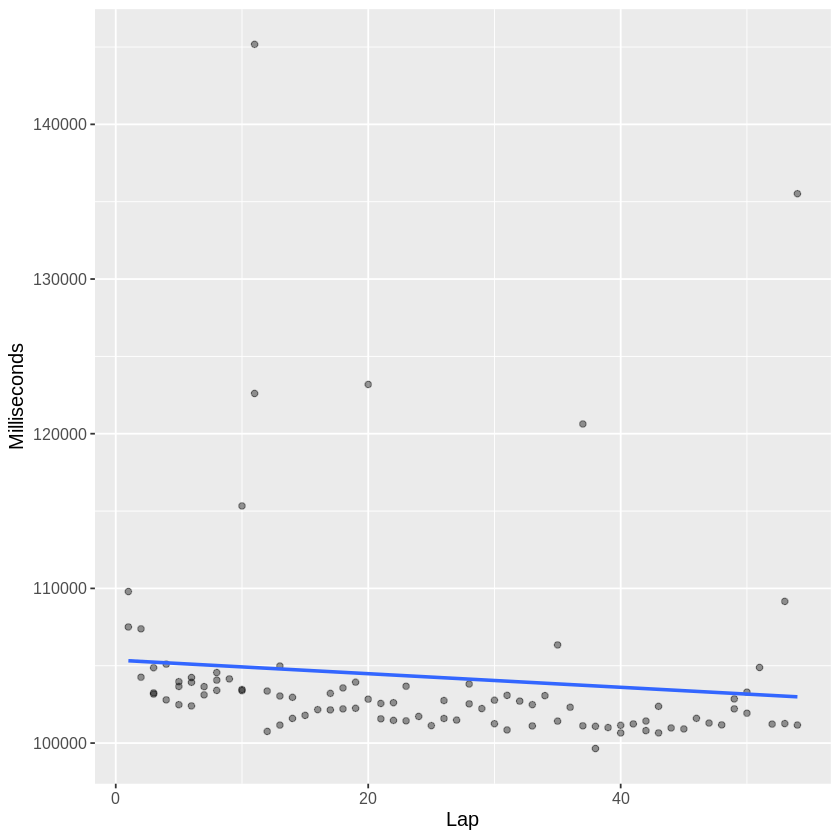

In [23]:
set.seed(2022)

#19. USA, Austin

pg_austin <- gas_laps %>%
                filter(raceId %in% austin_race_ID) 

pg_austin_clean <- pg_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
pg_austin_clean
pg_austin_clean_ID <- pg_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_austin_races <- gas_laps %>%
                    filter(raceId %in% pg_austin_clean_ID)

formulaone_split <- initial_split(pg_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1070,71
986,70
1027,70
1007,69


`geom_smooth()` using formula 'y ~ x'



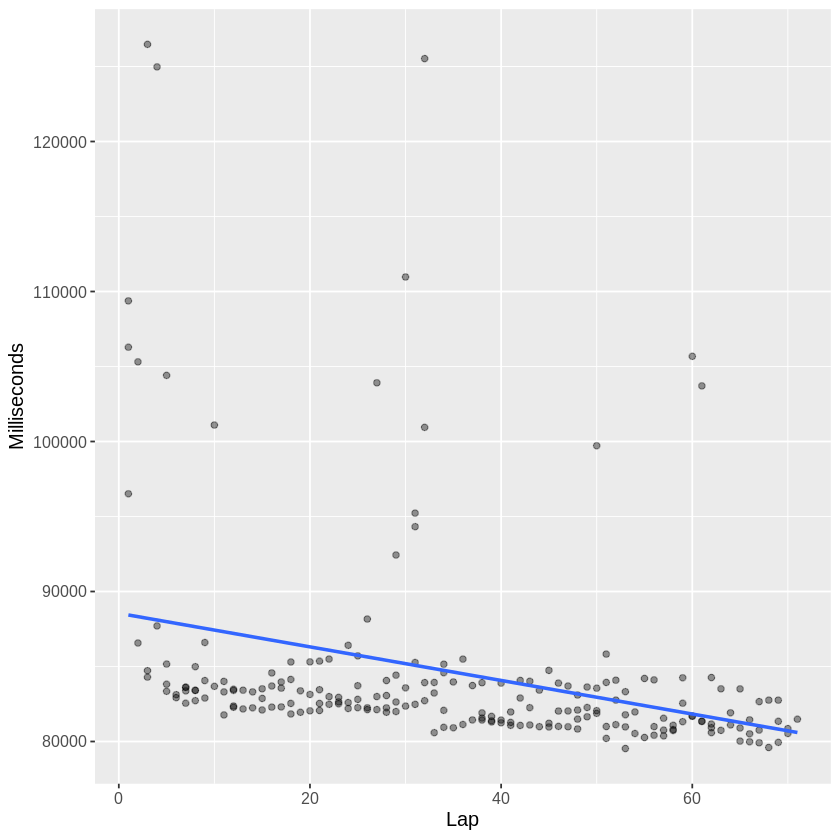

In [24]:
set.seed(2022)

#20. Mexico

pg_mexico <- gas_laps %>%
                filter(raceId %in% mexico_race_ID) 

pg_mexico_clean <- pg_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
pg_mexico_clean
pg_mexico_clean_ID <- pg_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_mexico_races <- gas_laps %>%
                    filter(raceId %in% pg_mexico_clean_ID)

formulaone_split <- initial_split(pg_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1029,71
987,70
1008,70
1071,70


`geom_smooth()` using formula 'y ~ x'



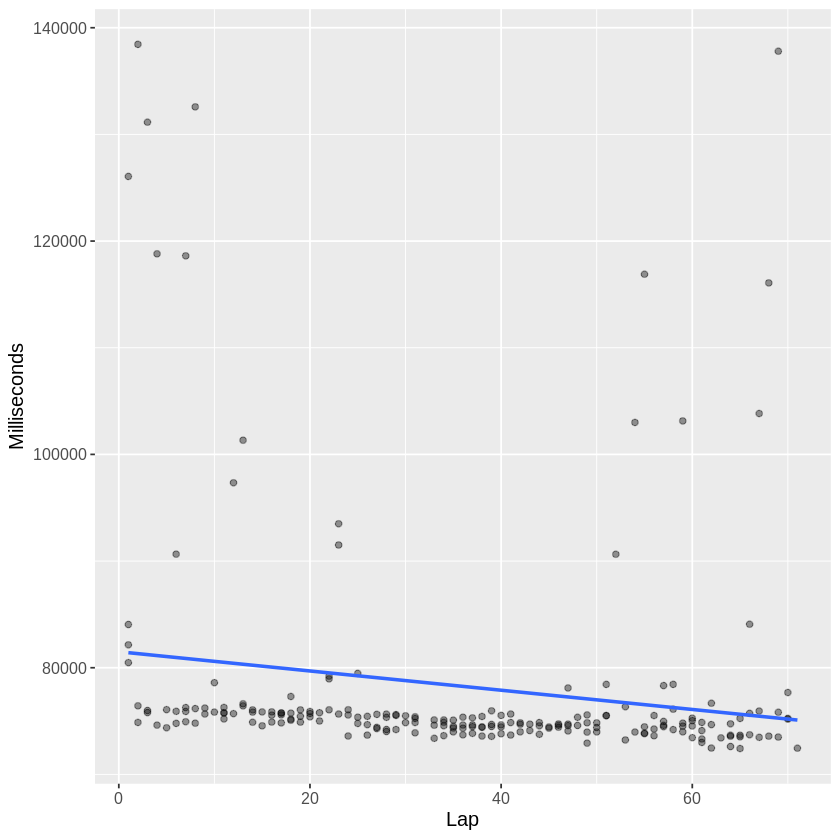

In [25]:
set.seed(2022)

#21. Brazil

pg_brazil <- gas_laps %>%
                filter(raceId %in% brazil_race_ID) 

pg_brazil_clean <- pg_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
pg_brazil_clean
pg_brazil_clean_ID <- pg_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_brazil_races <- gas_laps %>%
                    filter(raceId %in% pg_brazil_clean_ID)

formulaone_split <- initial_split(pg_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1047,55
988,54
1030,53
1009,46


`geom_smooth()` using formula 'y ~ x'



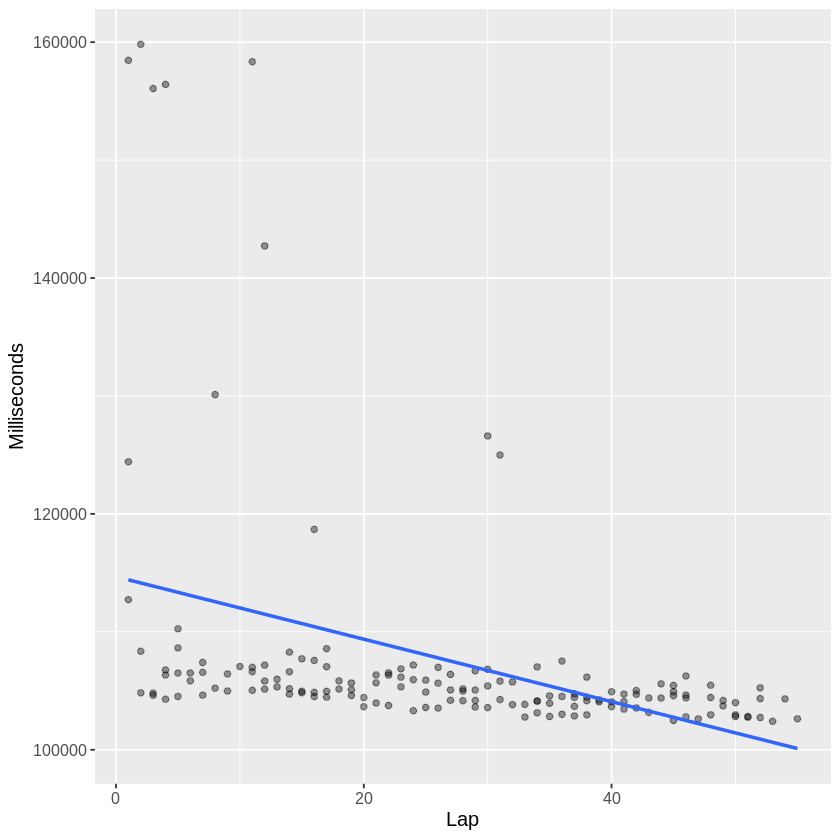

In [26]:
set.seed(2022)

#22. Abu Dhabi

pg_uae <- gas_laps %>%
                filter(raceId %in% uae_race_ID) 

pg_uae_clean <- pg_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
pg_uae_clean
pg_uae_clean_ID <- pg_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

pg_uae_races <- gas_laps %>%
                    filter(raceId %in% pg_uae_clean_ID)

formulaone_split <- initial_split(pg_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

get_uae_prediction()

## Collection

In [27]:
rmse_col
racetime_col

# write_csv(rmse_col, "pg_rmse.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,13455.881,1
rmse,standard,7325.898,2
rmse,standard,2046.781,3
rmse,standard,20447.208,4
rmse,standard,8194.344,5
rmse,standard,7399.506,6
rmse,standard,5319.330,7
rmse,standard,19640.251,8
rmse,standard,3401.123,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5757582,95.95970,1.599328,1
5626323,93.77204,1.562867,2
5234982,87.24970,1.454162,3
5709079,95.15132,1.585855,4
5762721,96.04535,1.600756,5
5718508,95.30847,1.588474,6
6126020,102.10033,1.701672,7
5943365,99.05608,1.650935,8
5494594,91.57657,1.526276,9
